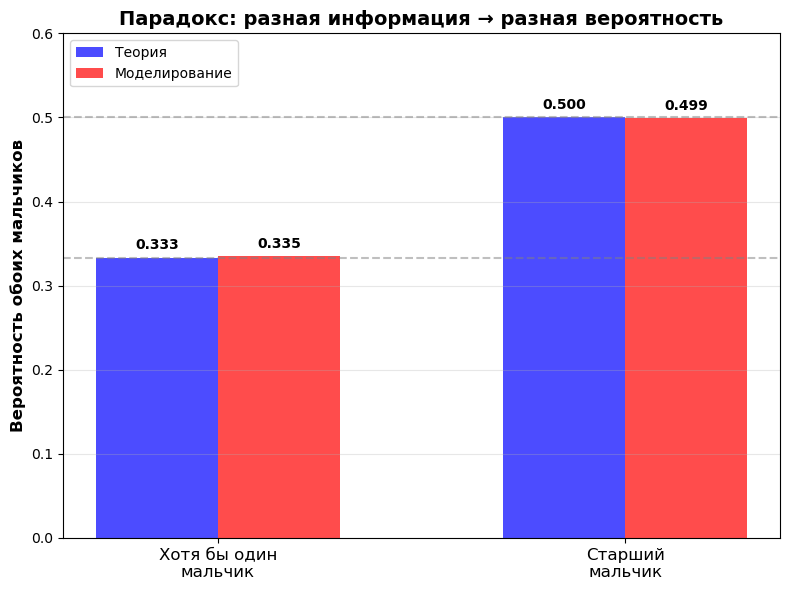

ПАРАДОКС МАЛЬЧИКА И ДЕВОЧКИ

Симуляция на 50000 семьях:

1. 'Хотя бы один мальчик':
   Моделирование: 0.3353 (33.5%)
   Теория: 0.3333 (33.3%)

2. 'Старший мальчик':
   Моделирование: 0.4989 (49.9%)
   Теория: 0.5000 (50.0%)

Разница: 16.4%


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def симуляция(тип, эксперименты=100000):
    оба_мальчика = 0
    подходящие = 0
    
    for _ in range(эксперименты):
        старший = np.random.randint(0, 2)
        младший = np.random.randint(0, 2)
        
        if тип == 'хотя_бы_один':
            if старший == 1 or младший == 1:
                подходящие += 1
                if старший == 1 and младший == 1:
                    оба_мальчика += 1
        else:
            if старший == 1:
                подходящие += 1
                if младший == 1:
                    оба_мальчика += 1
    
    вероятность = оба_мальчика / подходящие if подходящие > 0 else 0
    return вероятность

количество = 50000
вероятность1 = симуляция('хотя_бы_один', количество)
вероятность2 = симуляция('старший_мальчик', количество)

типы = ['Хотя бы один\nмальчик', 'Старший\nмальчик']
вероятности = [вероятность1, вероятность2]
теория = [1/3, 1/2]

plt.figure(figsize=(8, 6))

x = np.arange(len(типы))
plt.bar(x - 0.15, теория, width=0.3, label='Теория', color='blue', alpha=0.7)
plt.bar(x + 0.15, вероятности, width=0.3, label='Моделирование', color='red', alpha=0.7)

plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
plt.axhline(y=1/3, color='gray', linestyle='--', alpha=0.5)

plt.xticks(x, типы, fontsize=12)
plt.ylabel('Вероятность обоих мальчиков', fontsize=12, fontweight='bold')
plt.title('Парадокс: разная информация → разная вероятность', fontsize=14, fontweight='bold')
plt.ylim(0, 0.6)
plt.legend(loc='upper left')
plt.grid(axis='y', alpha=0.3)

for i in range(len(типы)):
    plt.text(i - 0.15, теория[i] + 0.01, f'{теория[i]:.3f}', ha='center', fontweight='bold')
    plt.text(i + 0.15, вероятности[i] + 0.01, f'{вероятности[i]:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("="*50)
print("ПАРАДОКС МАЛЬЧИКА И ДЕВОЧКИ")
print("="*50)
print(f"\nСимуляция на {количество} семьях:")
print(f"\n1. 'Хотя бы один мальчик':")
print(f"   Моделирование: {вероятность1:.4f} ({вероятность1*100:.1f}%)")
print(f"   Теория: 0.3333 (33.3%)")
print(f"\n2. 'Старший мальчик':")
print(f"   Моделирование: {вероятность2:.4f} ({вероятность2*100:.1f}%)")
print(f"   Теория: 0.5000 (50.0%)")
print(f"\nРазница: {(вероятность2 - вероятность1)*100:.1f}%")